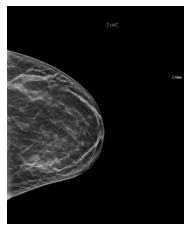

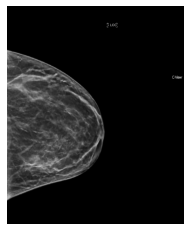

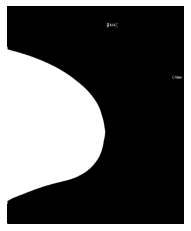

In [3]:
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

test_pic = "C:..\\..\\datasets\\image\\clean_png\\1.2.826.0.1.3680043.8.498.10000118454892828674141713285403927285.dcm.png"
test2_pic = "C:..\\..\\datasets\\image\\clean_png\\1.2.826.0.1.3680043.8.498.10000118454892828674141713285403927285.dcm.png"
# Read the PNG file
img = cv2.imread(test_pic)

# Display the image with the 'gray' colormap
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

# Read the image. 
img_bil = cv2.imread(test_pic) 

# Apply bilateral filter with d = 15, 
# sigmaColor = sigmaSpace = 75. 
bilateral = cv2.bilateralFilter(img_bil, 9, 150, 150) 

# Save the output. 
# cv2.imwrite('taj_bilateral.jpg', bilateral) 
plt.imshow(bilateral, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

# binarization: use thresholding to create a binary mask
th, img_binary = cv2.threshold(bilateral, 1, 255, cv2.THRESH_BINARY)
plt.imshow(img_binary, cmap='gray')
plt.axis('off')
plt.show()




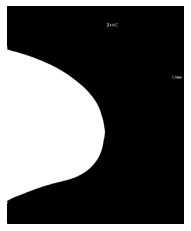

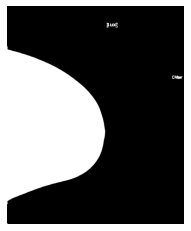

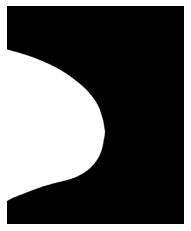

In [51]:
# expand the border of white contours

plt.imshow(img_binary, cmap='gray')
plt.axis('off')
plt.show()
kernel = np.ones((5,5),np.uint8)
img_dliate = cv2.morphologyEx(img_binary, cv2.MORPH_DILATE, kernel)
plt.imshow(img_dliate, cmap='gray')
plt.axis('off')
plt.show()

kernel = np.ones((9,9),np.uint8)
img_opening = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernel)
plt.imshow(img_opening, cmap='gray')
plt.axis('off')
plt.show()


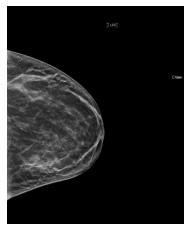

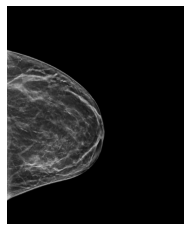

In [54]:
# deciding the breast area with binary mask

img_masked = cv2.bitwise_and(bilateral,img_opening)
plt.imshow(bilateral, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img_masked, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
import csv
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

miss_table_path = "D:..\\..\\datasets\\table\\miss_metadata.csv"
clean_table_path = "D:..\\..\\datasets\\table\\clean_metadata.csv"
miss_png_path = "D:..\\..\\datasets\\image\\miss_png\\"
clean_png_path = "D:..\\..\\datasets\\image\\clean_png\\"
miss_bilateral_png = "D..\\..\\datasets\\image\\miss_bilateral_png\\"
clean_bilateral_png = "D:..\\..\\datasets\\image\\clean_bilateral_png\\"

miss_ori = list(map(lambda x: x.split('/')[9], pd.read_csv(miss_table_path, dtype=str)['anon_dicom_path']))
clean_ori = list(map(lambda x: x.split('/')[9], pd.read_csv(clean_table_path, dtype=str)['anon_dicom_path']))

def bilateral_filter(ori_path, bil_path):  
    ori_img = cv2.imread(ori_path)
    # print(ori_path,'to', bil_path)
    bil_img = cv2.bilateralFilter(ori_img, 9, 150, 150)
    return bil_img

def select_breast_area(bil_img):
    # binarization: use thresholding to create a binary mask
    th, img_binary = cv2.threshold(bil_img, 1, 255, cv2.THRESH_BINARY)
    # expand the border of white contours (dliate -> open)
    kernel = np.ones((9,9),np.uint8)
    img_opening = cv2.morphologyEx(img_binary, cv2.MORPH_OPEN, kernel)
    # deciding the breast area with binary mask
    img_masked = cv2.bitwise_and(bil_img,img_opening)
    return img_masked

for name in clean_ori:
    ori_path = clean_png_path+name+".png"
    bil_path = clean_bilateral_png+name+".png"
    bil_img = bilateral_filter(ori_path, bil_path)
    masked_img = select_breast_area(bil_img)

for name in miss_ori:
    ori_path = miss_png_path+name+".png"
    bil_path = miss_bilateral_png+name+".png"
    bil_img = bilateral_filter(ori_path, bil_path)
    masked_img = select_breast_area(bil_img)
